# Question 1: Linear classfication 

In [1]:
def train(train_file, threshold):
    with open(train_file) as train_file:
        lines = train_file.read().splitlines()
    train_date = [line.split(',') for line in lines]

    symmetry_value = [float(data[0]) for data in train_date]
    intensity_value = [float(data[1]) for data in train_date]
    label_value = [float(data[2]) for data in train_date]

    # initiate theta value
    theta = [0, 0]
    iter_no = 0
    while iter_no < threshold:
        for i in range(0, len(train_date)):
            if label_value[i]*(theta[0]*symmetry_value[i] + theta[1]*intensity_value[i]) <= 0:
                theta[0] += label_value[i]*symmetry_value[i]
                theta[1] += label_value[i]*intensity_value[i]
            else:
                pass
        iter_no += 1
    print("when iteration={}, theta is {}".format(threshold, theta))
    return theta

def predict(test_file, theta):
    with open(test_file) as test_file:
        lines = test_file.read().splitlines()
    test_date = [line.split(',') for line in lines]

    symmetry_value = [float(data[0]) for data in test_date]
    intensity_value = [float(data[1]) for data in test_date]
    label_value = [float(data[2]) for data in test_date]

    predicted_label = []
    for i in range(0, len(test_date)):
        predicted_value = theta[0]*symmetry_value[i] + theta[1]*intensity_value[i]
        if predicted_value >= 0:
            predicted_label.append(1.0)
        else:
            predicted_label.append(-1.0)
    correct_num = 0
    if len(label_value) == len(predicted_label):
        for i in range(0, len(label_value)):
            correct_num += 1 if label_value[i] == predicted_label[i] else 0
    else:
        print("something went wrong.")

    accuracy = correct_num/len(label_value)
    print("when theta = {}, the accuracy: {}".format(theta, accuracy))


## (a) Run the perceptron algorithm for 5 interations

In [2]:
train_1 = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/1/train_1_5.csv"
test_1 = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/1/test_1_5.csv"

# set the threshold as how many iterations you want to run perceptron algorithm
theta = train(train_1, threshold=5)
predict(test_1, theta)

when iteration=5, theta is [-1.1269491749773728, -2.9300171653878735]
when theta = [-1.1269491749773728, -2.9300171653878735], the accuracy: 0.9660678642714571


## (b) Run the perceptron algorithm for 10 interations

In [3]:
theta_2 = train(train_1, threshold=10)
predict(test_1, theta_2)

when iteration=10, theta is [-1.1593800264589689, -3.0299410655260175]
when theta = [-1.1593800264589689, -3.0299410655260175], the accuracy: 0.9670658682634731


# Question 2: Linear and polynomial regression

In [4]:
import random

import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np


# TODO: (a) Load the data and plot it
def load_plot_data(input_file, output_file):
    with open(input_file) as input_file:
        input_lines = input_file.read().splitlines()
    with open(output_file) as output_file:
        output_lines = output_file.read().splitlines()

    # Clear input data
    input_data_str = list(filter(None, [line.replace('   ', '') for line in input_lines]))
    input_data = [float(data) for data in input_data_str]
    output_data_str = list(filter(None, [line.replace('   ', '') for line in output_lines]))
    output_data = [float(data) for data in output_data_str]

    plt.plot(input_data, output_data, 'o', markersize=1)

    plt.show()


# TODO: (b) Implement the closed form linear regression formula to obtain the weight vector theta.
#  Plot both the linear regression line and the data on the same graph
def calculate_weight_theta_closed_form(input_file, output_file):
    with open(input_file) as input_file:
        input_lines = input_file.read().splitlines()
    with open(output_file) as output_file:
        output_lines = output_file.read().splitlines()

    # Clear input data
    input_data_str = list(filter(None, [line.replace('   ', '') for line in input_lines]))
    input_data = [[1.0, float(data)] for data in input_data_str]
    output_data_str = list(filter(None, [line.replace('   ', '') for line in output_lines]))
    output_data = [float(data) for data in output_data_str]

    n = len(input_data)
    # Calculate matrix A
    matrix_x = np.array(input_data)
    matrix_x_T = matrix_x.transpose()
    matrix_a = np.array(1/n*np.dot(matrix_x_T, matrix_x), dtype='float')
    inv_matrix_a = inv(matrix_a)
    # Calculate b
    matrix_y = np.array(output_data)
    matrix_b = 1/n*np.dot(matrix_x_T, matrix_y)
    # Calculate theta
    theta = np.dot(inv_matrix_a, matrix_b)
    print("theta(closed form): ", theta)

    matrix_predicted_y = np.dot(matrix_x, theta)

    plt.plot(matrix_x[:, 1], matrix_y, 'o', markersize=1)
    plt.plot(matrix_x[:, 1], matrix_predicted_y, 'g')
    plt.show()
    return matrix_x, matrix_y, matrix_predicted_y


# TODO: (c) Evaluate the training error in terms of empirical risk of the resulting fit in 2(b)
#  and report the error.
def calculate_training_error(matrix_x, matrix_y, matrix_predicted_y):
    n = len(matrix_x)
    empirical_risk = 1/n * sum([((matrix_y[i]-matrix_predicted_y[i])**2)/2 for i in range(0, n)])
    print("empirical_risk(closed_form): ", empirical_risk)
    return empirical_risk


# TODO: (d) Calculate weight vector theta using gradient descent with eta=0.01, threshold=100
def calculate_weight_theta_gradient_descent(matrix_x, matrix_y, eta, threshold):
    theta = np.array([0.0, 0.0])
    n = len(matrix_x)
    risk_result = 500

    for iter_no in range(0, threshold):
        for i in range(0, n):
            y = matrix_y[i]
            predicted_y = np.dot(matrix_x[i], theta)
            theta += eta*(y-predicted_y)*matrix_x[i]
            empirical_risk = 1 / n * sum([((matrix_y[i] - np.dot(matrix_x, theta)[i]) ** 2) / 2 for i in range(0, n)])
            if empirical_risk < risk_result:
                risk_result = empirical_risk
                theta_result = list(theta)

    print("theta(gradient_descent): ", theta_result)
    print("empirical_risk(gradient_descent): ", risk_result)
    return theta


# TODO: (e) Calculate weight vector theta using stochastic gradient descent with eta=0.01, threshold=50
def calculate_weight_theta_stochastic_gradient(matrix_x, matrix_y, eta, threshold):
    theta = np.array([0.0, 0.0])
    n = len(matrix_x)
    risk_result = 500
    for iter_no in range(0, threshold):
        i = random.randint(0, n-1)
        y = matrix_y[i]
        predicted_y = np.dot(matrix_x[i], theta)
        theta += eta*(y-predicted_y)*matrix_x[i]
        empirical_risk = 1 / n * sum([((matrix_y[i] - np.dot(matrix_x, theta)[i]) ** 2) / 2 for i in range(0, n)])

        if empirical_risk < risk_result:
            risk_result = empirical_risk
            theta_result = theta

    print("theta(stochastic_gradient): ", theta_result)
    print("empirical_risk(stochastic_gradient): ", risk_result)
    return theta


# TODO: (f) Add the features x^2, x^3, ...x^d to the inputs and
#  performs polynomial regression using closed form solution
def PolyRegress(x, y, d):
    with open(x) as input_file:
        input_lines = input_file.read().splitlines()
    with open(y) as output_file:
        output_lines = output_file.read().splitlines()

    # Clear input data
    input_data_str = list(filter(None, [line.replace('   ', '') for line in input_lines]))
    input_data = [[float(data)] for data in input_data_str]
    initial_x = np.array(input_data)
    temp = np.ones(shape=initial_x.shape)
    matrix_x = np.concatenate((temp.reshape(-1, 1), initial_x.reshape(-1, 1)), 1)
    if d >= 2:
        for i in range(2, d+1):
            matrix_x = np.concatenate((matrix_x, (initial_x**i).reshape(-1, 1)), 1)

    output_data_str = list(filter(None, [line.replace('   ', '') for line in output_lines]))
    output_data = [float(data) for data in output_data_str]

    n = len(input_data)
    # Calculate matrix A
    matrix_x_T = matrix_x.transpose()
    matrix_a = np.array(1/n*np.dot(matrix_x_T, matrix_x), dtype='float')
    inv_matrix_a = inv(matrix_a)
    # Calculate b
    matrix_y = np.array(output_data)
    matrix_b = 1/n*np.dot(matrix_x_T, matrix_y)
    # Calculate theta
    theta = np.dot(inv_matrix_a, matrix_b)
    print("theta(poly regression for d = {}): ".format(d), theta)
    matrix_predicted_y = np.dot(matrix_x, theta)

    return matrix_x, matrix_y, theta, matrix_predicted_y


# TODO: (g) Get a quadratic fit of the data. Plot the data and the fit. Report the training error.
#  Repeat the same for 3rd order fit to 9th order fit.
def training_error_for_poly_regression(input_file, output_file):
    training_error_dic = {}
    # for quadratic fit
    matrix_x, matrix_y, theta, matrix_predicted_y = PolyRegress(input_file, output_file, d=2)
    n = len(matrix_x)
    empirical_risk = 1 / n * sum([((matrix_y[i] - np.dot(matrix_x, theta)[i]) ** 2) / 2 for i in range(0, n)])

    training_error_dic["quadratic fit"] = empirical_risk
    print("training error for a quadratic fit: ", empirical_risk)
    plt.plot(matrix_x[:, 1], matrix_y, 'o', markersize=1)
    plt.plot(matrix_x[:, 1], matrix_predicted_y, 'g')
    plt.show()
    for i in range(3, 10):
        matrix_x, matrix_y, theta, matrix_predicted_y = PolyRegress(input_file, output_file, d=i)
        empirical_risk = 1 / n * sum([((matrix_y[i] - np.dot(matrix_x, theta)[i]) ** 2) / 2 for i in range(0, n)])
        training_error_dic["{}th order fit".format(i)] = empirical_risk
        print("training error for a {}th order fit: ".format(i), empirical_risk)
        plt.plot(matrix_x[:, 1], matrix_y, 'o', markersize=1)
        plt.plot(matrix_x[:, 1], matrix_predicted_y, 'g')
        plt.show()
    print("training error from 3th order fit to 9th order fit: ", training_error_dic)

## (a) Load the data and plot it

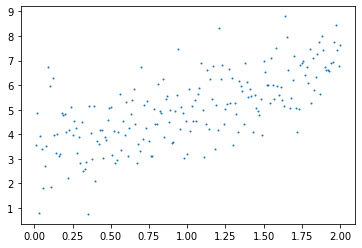

In [5]:
input_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/2/hw1x.dat"
output_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/2/hw1y.dat"

load_plot_data(input_file, output_file)
    

## (b) Obtain the weoght vector theta from the closed form linear regression formula and plot the graph

theta(closed form):  [3.2447227  1.78157138]


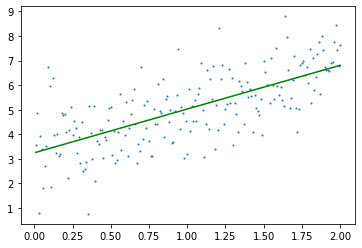

In [6]:
matrix_x, matrix_y, matrix_predicted_y = calculate_weight_theta_closed_form(input_file, output_file)

## (c) Evaluate the training error in terms of empirical risk of the resulting fir in 2(b) and report the error

In [7]:
calculate_training_error(matrix_x, matrix_y, matrix_predicted_y)

empirical_risk(closed_form):  0.5812605752543937


0.5812605752543937

## (d) Calculate the weight vector theta using gradient descent. consider the learning rate eta=0.01 and the number of iterations as 100. Report theta for minimum empirical risk from all the iterations.

In [8]:
calculate_weight_theta_gradient_descent(matrix_x, matrix_y, eta=0.01, threshold=100)

theta(gradient_descent):  [3.1063839321716147, 1.89593270838936]
empirical_risk(gradient_descent):  0.583714184922541


array([3.13074422, 1.96402963])

## (e) Calculate the weight vector theta using stochastic gradient descent. consider the learning rate eta=0.01 and the number of iterations as 50. Report theta for minimum empirical risk from all the iterations.

In [9]:
calculate_weight_theta_stochastic_gradient(matrix_x, matrix_y, eta=0.01, threshold=50)

theta(stochastic_gradient):  [1.57192688 1.66102805]
empirical_risk(stochastic_gradient):  2.192796007951083


array([1.57192688, 1.66102805])

## (f) Perform polynomial regression using closed form solution

In [10]:
PolyRegress(input_file, output_file, d=5)

theta(poly regression for d = 5):  [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]


(array([[1.00000000e+00, 1.00000000e-02, 1.00000000e-04, 1.00000000e-06,
         1.00000000e-08, 1.00000000e-10],
        [1.00000000e+00, 2.00000000e-02, 4.00000000e-04, 8.00000000e-06,
         1.60000000e-07, 3.20000000e-09],
        [1.00000000e+00, 3.00000000e-02, 9.00000000e-04, 2.70000000e-05,
         8.10000000e-07, 2.43000000e-08],
        ...,
        [1.00000000e+00, 1.98000000e+00, 3.92040000e+00, 7.76239200e+00,
         1.53695362e+01, 3.04316816e+01],
        [1.00000000e+00, 1.99000000e+00, 3.96010000e+00, 7.88059900e+00,
         1.56823920e+01, 3.12079601e+01],
        [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
         1.60000000e+01, 3.20000000e+01]]),
 array([3.5576671 , 4.873885  , 0.80115314, 3.9421733 , 3.4187652 ,
        1.8123117 , 2.706408  , 3.5026245 , 6.7583969 , 5.969437  ,
        1.8701131 , 6.2749235 , 3.9854042 , 3.2169451 , 4.0147429 ,
        3.1150339 , 3.2158557 , 4.8496976 , 4.7890345 , 4.8171924 ,
        4.0914971 , 2.2

## (g) Plot the data and the quadratic fit. Report the training error. 

ANSWER: the quadratic fit is a better fit. from 3th fit to 9th order fit, the order fit which the error get worse is not observed.

theta(poly regression for d = 2):  [3.58076915 0.78341361 0.49659591]
training error for a quadratic fit:  0.5703016121648224


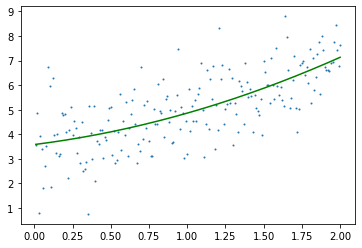

theta(poly regression for d = 3):  [3.52394943 1.11846512 0.08090267 0.13787504]
training error for a 3th order fit:  0.5700844364691353


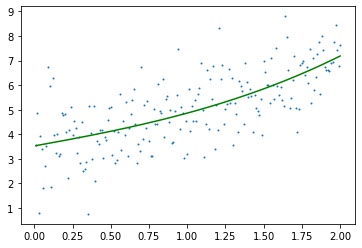

theta(poly regression for d = 4):  [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]
training error for a 4th order fit:  0.5646163879286425


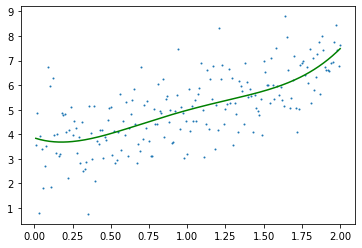

theta(poly regression for d = 5):  [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]
training error for a 5th order fit:  0.5638968184749199


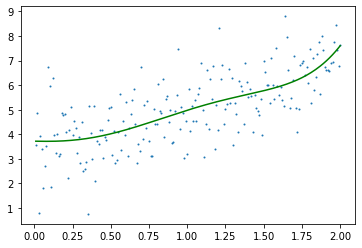

theta(poly regression for d = 6):  [  3.43194652   5.56010881 -27.43134436  58.72902212 -54.95621252
  23.44890145  -3.72427726]
training error for a 6th order fit:  0.5613433038902965


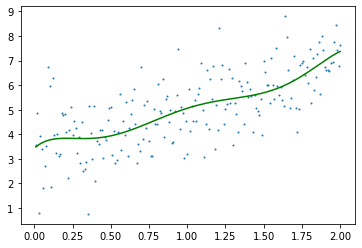

theta(poly regression for d = 7):  [   2.98164398   17.311469   -104.72228095  270.37451364 -343.19084434
  229.48681986  -77.69332837   10.51443513]
training error for a 7th order fit:  0.55623525158195


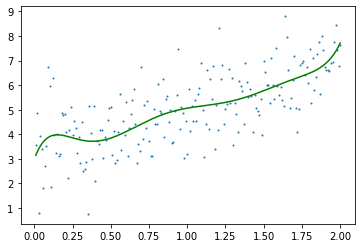

theta(poly regression for d = 8):  [   2.63574436   28.7015004  -201.17746413  617.80783844 -987.05573797
  893.36432981 -462.3150425   127.58306479  -14.56077445]
training error for a 8th order fit:  0.5537805800023025


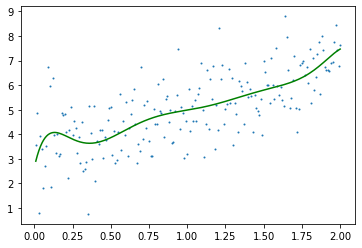

theta(poly regression for d = 9):  [    2.41077731    37.81581289  -297.47701359  1057.54102516
 -2043.90336227  2357.90825653 -1673.06053162   716.70991135
  -170.16661072    17.20351464]
training error for a 9th order fit:  0.552923335394572


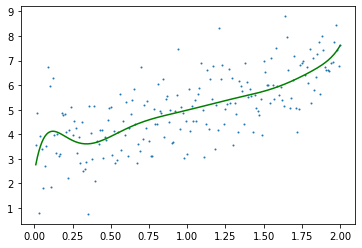

training error from 3th order fit to 9th order fit:  {'quadratic fit': 0.5703016121648224, '3th order fit': 0.5700844364691353, '4th order fit': 0.5646163879286425, '5th order fit': 0.5638968184749199, '6th order fit': 0.5613433038902965, '7th order fit': 0.55623525158195, '8th order fit': 0.5537805800023025, '9th order fit': 0.552923335394572}


In [11]:
training_error_for_poly_regression(input_file, output_file)

# Question 3: Ridge regression 

In [12]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


# TODO: (a) Calculate the exact solution theta
def ridge_regression(tX, tY, l):
    n = len(tX)
    matrix_I = np.identity(tX.shape[1], dtype='float')
    tX_transpose = tX.transpose()
    term_1_1 = n*l*matrix_I
    term_1_2 = np.dot(tX_transpose, tX)
    term_1 = inv(term_1_1 + term_1_2)
    theta = np.dot(np.dot(term_1, tX_transpose), tY)
    print("when lambda={}, theta: \n{}".format(l, theta))
    return theta


# TODO: (b) Plot graphs of the validation loss and training loss as lambda =10^-5 to 10^0,
#  return the lambda that minimizes the validation loss
def calculate_loss_and_plot(vX, vY, tX, tY):
    tn = tX.shape[0]
    vn = vX.shape[0]
    tloss = []
    vloss = []
    loss_dic = {}

    index = -np.arange(0, 5, 0.1)
    for i in index:
        w = ridge_regression(tX, tY, 10**i)
        tloss = tloss+[np.sum((np.dot(tX, w)-tY)**2/tn/2)]
        vloss = vloss+[np.sum((np.dot(vX, w)-vY)**2/vn/2)]
        loss_dic[np.sum((np.dot(vX, w)-vY)**2/vn/2)] = 10**i

    plt.plot(index, np.log(tloss), 'r')
    plt.plot(index, np.log(vloss), 'b')
    plt.show()
    min_loss_value = min(loss_dic.keys())
    print("the minimum validation loss: ", min_loss_value)
    print("the value of lambda with min validation loss: ", loss_dic[min_loss_value])


## (a) Report the result value of theta for lambda=0.15

In [13]:
input_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/3/hw1_ridge_x.dat"
output_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW1/data/3/hw1_ridge_y.dat"

with open(input_file) as input_file:
    input_lines = input_file.read().splitlines()
with open(output_file) as output_file:
    output_lines = output_file.read().splitlines()
    
matrix_x = np.array([line.split(',') for line in input_lines], dtype='float')
matrix_y = np.array([[line] for line in output_lines], dtype='float')
vX = matrix_x[0:10]
tX = matrix_x[-40:]
vY = matrix_y[0:10]
tY = matrix_y[-40:]

ridge_regression(tX, tY, l=0.15)

when lambda=0.15, theta: 
[[-0.57939825]
 [ 1.15033028]
 [ 0.04934122]
 [-1.59867896]]


array([[-0.57939825],
       [ 1.15033028],
       [ 0.04934122],
       [-1.59867896]])

## (b) Plot the graph. Write down the vaue of lambda that minimized the validation loss.

when lambda=1.0, theta: 
[[-0.44793198]
 [ 0.61618023]
 [ 0.0582213 ]
 [-0.87515639]]
when lambda=0.7943282347242815, theta: 
[[-0.48110294]
 [ 0.69210787]
 [ 0.06053482]
 [-0.98133968]]
when lambda=0.6309573444801932, theta: 
[[-0.50929184]
 [ 0.76798831]
 [ 0.0616733 ]
 [-1.08651316]]
when lambda=0.5011872336272722, theta: 
[[-0.53209185]
 [ 0.84206302]
 [ 0.06164061]
 [-1.18816119]]
when lambda=0.3981071705534972, theta: 
[[-0.54958271]
 [ 0.91271913]
 [ 0.0605509 ]
 [-1.28409393]]
when lambda=0.31622776601683794, theta: 
[[-0.56224167]
 [ 0.97861849]
 [ 0.05860313]
 [-1.37261197]]
when lambda=0.25118864315095796, theta: 
[[-0.57080314]
 [ 1.0387845 ]
 [ 0.0560429 ]
 [-1.45258977]]
when lambda=0.19952623149688792, theta: 
[[-0.5761095 ]
 [ 1.09263618]
 [ 0.05312271]
 [-1.52347687]]
when lambda=0.15848931924611134, theta: 
[[-0.57898688]
 [ 1.13997097]
 [ 0.05006964]
 [-1.58523299]]
when lambda=0.12589254117941673, theta: 
[[-0.58016307]
 [ 1.18090849]
 [ 0.04706567]
 [-1.63822219]]


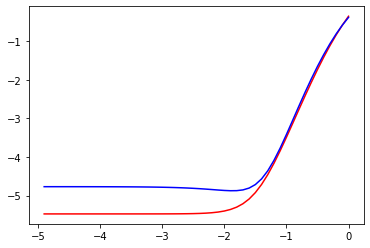

the minimum validation loss:  0.007627810885830867
the value of lambda with min validation loss:  0.012589254117941668


In [14]:
calculate_loss_and_plot(vX, vY, tX, tY)
